<div align="center">

This is notebook  for ML Project 

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [3]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
#%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  2024-3-25 Python-3.11.8 torch-2.2.1+cpu CPU


Setup complete  (8 CPUs, 15.8 GB RAM, 19.0/31.4 GB disk)


In [1]:
import torch

print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

if torch.cuda.is_available():
    print("CUDA is available! You can use GPU acceleration.")
else:
    print("CUDA is not available. PyTorch will use CPU.")


0


AssertionError: Torch not compiled with CUDA enabled

# Train

Train a YOLOv5s Classification model on the dataset with

In [4]:
%echo %cd%

f:\ML project\yolov5


In [5]:
!python train.py --img 640 --batch 16 --epochs 5 --data cocoCustomData.yaml --weights yolov5s.pt --device='cuda' --nosave --cache


train: weights=yolov5s.pt, cfg=, data=cocoCustomData.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device='cuda', multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'F:\ML': No such file or directory
Traceback (most recent call last):
  File "f:\ML project\yolov5\train.py", line 848, in <module>
    main(opt)
  File "f:\ML project\yolov5\train.py", line 607, in main
    device = select_

# Test

test on a video

In [6]:
!python detect.py --weights runs/train/exp3/weights/last.pt --img 640 --conf 0.25 --device 'cuda' --source ../myvid.mp4

detect: weights=['runs/train/exp3/weights/last.pt'], source=../myvid.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device='cuda', view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'F:\ML': No such file or directory
Traceback (most recent call last):
  File "f:\ML project\yolov5\detect.py", line 312, in <module>
    main(opt)
  File "f:\ML project\yolov5\detect.py", line 307, in main
    run(**vars(opt))
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^

In [2]:
!python detect.py --weights runs/train/exp5/weights/best.pt --img 640 --conf 0.75 --source ../Bloo.jpg

detect: weights=['runs/train/exp5/weights/best.pt'], source=../Bloo.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.75, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'F:\ML': No such file or directory
YOLOv5  2024-3-25 Python-3.11.8 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 F:\ML project\Bloo.jpg: 480x640 9 RBCs, 213.0ms
Speed: 2.1ms pre-process, 213.0ms inference, 13.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


## following the pipeline


In [16]:
import os
import numpy as np
import pandas as pd
import torchvision
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor,Lambda
import numpy as np
import struct
from array import array
from os.path  import join
from torch import optim
import torch.nn.functional as f
import matplotlib.pyplot as plt 

# Image Loading and preprocessing

In [6]:
ImagePath = "./dataset/images/"        # images (relative to 'path')
LabelPath = "./dataset/labels/"        # labels (relative to 'path')

trainImages = os.path.join(ImagePath, 'train')
validImages = os.path.join(ImagePath, 'val')
trainlabels = os.path.join(LabelPath, 'train')
validlabels = os.path.join(LabelPath, 'val')

print("# of train Images: ", len(os.listdir(trainImages)))
print("# of valid Images: ", len(os.listdir(validImages)))
print("# of train Labels: ", len(os.listdir(trainlabels)))
print("# of valid Labels: ", len(os.listdir(validlabels)))

# of train Images:  264
# of valid Images:  270
# of train Labels:  264
# of valid Labels:  270


In [8]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

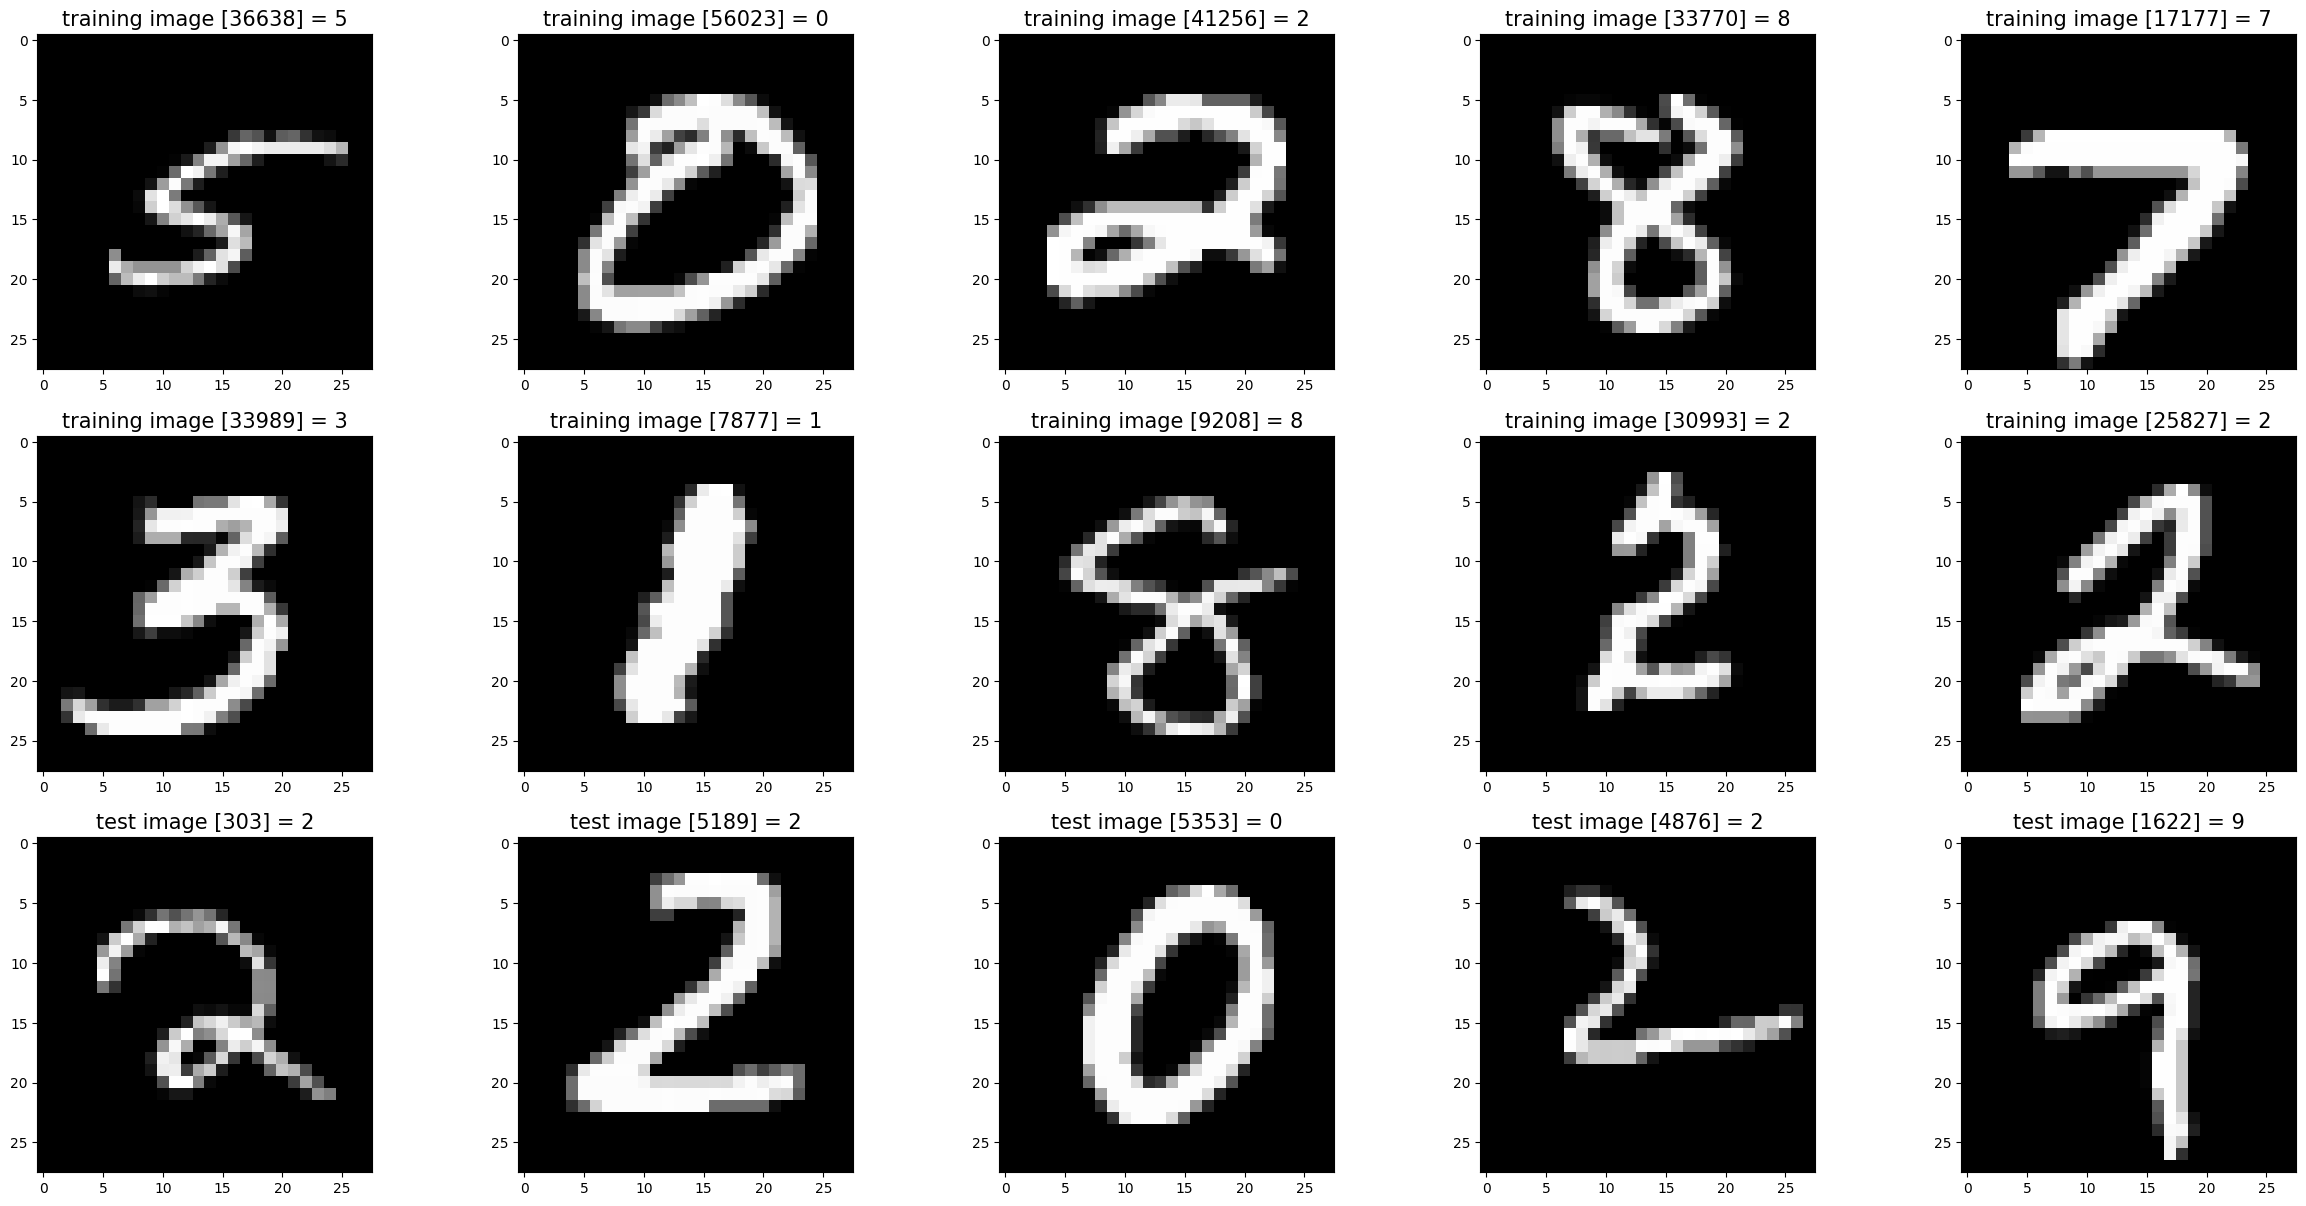

In [9]:
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './MNIST/raw/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [17]:
T=Compose([
    ToTensor(),
    #Lambda(Lambda image: image/255),
    #Lambda(Lambda image: image.view(784)),
])

data_train = torchvision.datasets.MNIST("mnist",download=True,train=True,transform=T)
data_test = torchvision.datasets.MNIST("mnist",download=True,train=False,transform=T)

#mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
#data_train, data_test = mnist_dataloader.load_data()
numb_batch=6


100%|██████████| 9912422/9912422 [00:10<00:00, 966199.52it/s] 


Extracting mnist\MNIST\raw\train-images-idx3-ubyte.gz to mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

: 

In [ ]:
train_dl=torch.utils.data.DataLoader(dataset=data_train,batch_size=numb_batch)
val_dl=torch.utils.data.DataLoader(dataset=data_test,batch_size=numb_batch)

# Image Segmentation

# Qualitative and Quantitative features 

# Classification